In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

(24, 3)


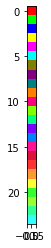

In [2]:
# inputRGB = np.array([
#     [0,255,127],
#     [128,0,0],
#     [0,139,139],
#     [124,252,0],
#     [139,0,0],
#     [165,42,42],
#     [255,0,0],
#     [32,178,170],
#     [154,205,50],
#     [152,251,152],
#     [135,206,235],
#     [70,130,180],
#     [255,127,80],
#     [127,255,0],
#     [255,215,0],
#     [233,150,122],
#     [0,255,0],
#     [0,191,255],
#     [0,255,255],
#     [0,206,209],
#     [127,255,212],
#     [47,79,79],
#     [0,0,255],
#     [255,182,193],
#     [102,205,170],
#     [255,255,0],
# ])

# inputRGB = np.array([
# [255,0,0],
# [0,255,0],
# [0,0,255],
# [255,255,0],
# [255,0,255],
# [0,255,255],
# [128,128,0],
# [128,0,128],
# [0,128,128],
# [255,128,0],
# [255,0,128],
# [128,255,0],
# [0,255,128],
# [128,0,255],
# [0,128,255],
# [255,20,147],
# [220,20,60],
# [255,51,51],
# [255,153,51],
# [255,255,51],
# [51,255,51],
# [153,255,51],
# [51,255,153],
# [51,255,255]])

inputRGB = np.array([
[255,0,0],
[0,255,0],
[0,0,255],
[255,255,0],
[255,0,255],
[0,255,255],
[128,128,0],
[128,0,128],
[0,128,128],
[255,128,0],
[255,0,128],
[128,255,0],
[0,255,128],
[128,0,255],
[0,128,255],
[255,20,147],
[220,20,60],
[255,51,51],
[255,153,51],
[255,255,51],
[51,255,51],
[153,255,51],
[51,255,153],
[51,255,255]])


normRGB = inputRGB/255
# print(normRGB)
plt.imshow(np.reshape(normRGB,(normRGB.shape[0],1,3)))
print(normRGB.shape)

(100, 100, 3)


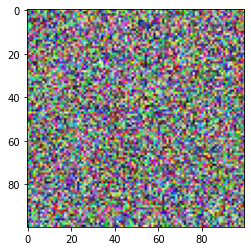

In [8]:
# Initialize the system
space_size = 100 # 100 x 100 grid of neurons
alpha_0 = 0.8
Nc = 20
max_epochs = 1000
sigma_dot = 5


# Initialize random weights
w = np.random.random((space_size,space_size,3))
# diff = np.abs(np.sum(normRGB[0] - w, axis=2))
plt.imshow(w)
print(w.shape)

In [ ]:
x = np.array([0.5,0.2,0.4])
diff = np.linalg.norm(x - w, axis =2)
print(diff.shape)
print(np.min(diff))
# np.unravel_index(np.argmin(diff, axis=None), diff.shape)
sigma = sigma_dot * np.exp(-1/(max_epochs))
# Nc = np.exp(-(np.min(diff)**2)/(2*(sigma**2)))
print(diff[57][50])
print(100/6)
print(sigma)

(100, 100)
0.02568460858285756
0.3901962055826304
16.666666666666668
0.999000499833375


Epoch Number: 20


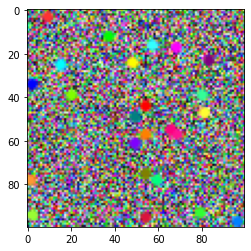

Epoch Number: 40


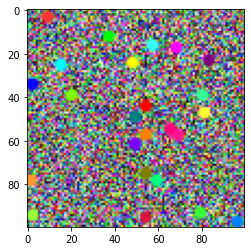

Epoch Number: 100


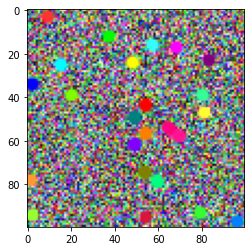

Epoch Number: 150


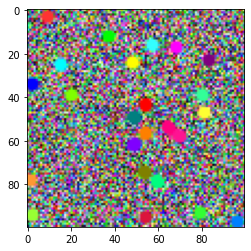

Epoch Number: 200


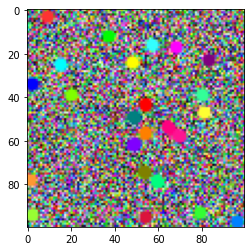

Epoch Number: 250


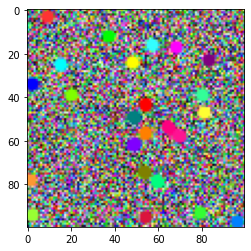

Epoch Number: 300


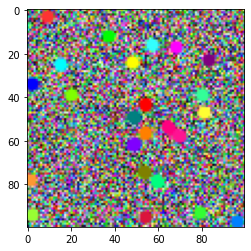

Epoch Number: 350


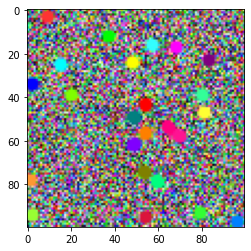

Epoch Number: 400


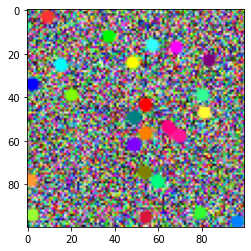

In [ ]:
epoch = 1
alpha = alpha_0
sigma = sigma_dot
# while epoch <= 1:
while epoch <= max_epochs:
  
  for x in normRGB:
        # calculate performance index //calculating distance
        diff = np.linalg.norm(x - w, axis =2)

        # find index of winning node
        ind = np.unravel_index(np.argmin(diff, axis=None), diff.shape)



        for i in range(100):
            for j in range(100):
                if i >= 0 and j>=0 and i < space_size and j < space_size:
                  distance = np.sqrt(np.sum((np.array([i, j]) - ind) ** 2))

                  # if distance < 3*sigma**2:
                  Neighbour_decaying = np.exp(-((distance)**2)/(2*(sigma**2)))
                  w[i][j] += alpha*Neighbour_decaying* (x-w[i][j])
                    
  sigma = sigma_dot * np.exp(-epoch/(max_epochs))
  alpha = alpha_0* np.exp(-epoch/(max_epochs))
#  increase the sigma value is basically increases radius of the clusters

  plot_ind = [ 20, 40, 100, 1000]
  if epoch in plot_ind:
    print("Epoch Number: {}".format(epoch))
    plt.imshow(w)
  # print(w)
  #         display.clear_output(wait=True)
    display.display(plt.gcf())


  epoch += 1
        
                
  

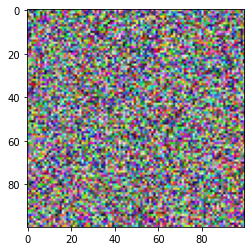

In [4]:
plt.imshow(w)